# About Dataset
The dataset could include various features and measurements related to the engine health of vehicles, such as engine RPM, temperature, pressure, and other sensor data. It may also include metadata on the vehicle, such as make, model, year, and mileage.

One potential project using this dataset could be to build a predictive maintenance model for automotive engines. By analyzing the patterns and trends in the data, machine learning algorithms could be trained to predict when an engine is likely to require maintenance or repair. This could help vehicle owners and mechanics proactively address potential issues before they become more severe, leading to better vehicle performance and longer engine lifetimes.

Another potential use for this dataset could be to analyze the performance of different types of engines and vehicles. Researchers could use the data to compare the performance of engines from different manufacturers, for example, or to evaluate the effectiveness of different maintenance strategies. This could help drive innovation and improvements in the automotive industry.

In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('./data/automotive_engine/engine_data.csv')

In [6]:
df.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


In [10]:
X = df.copy()
y = X.pop('Engine Condition')

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

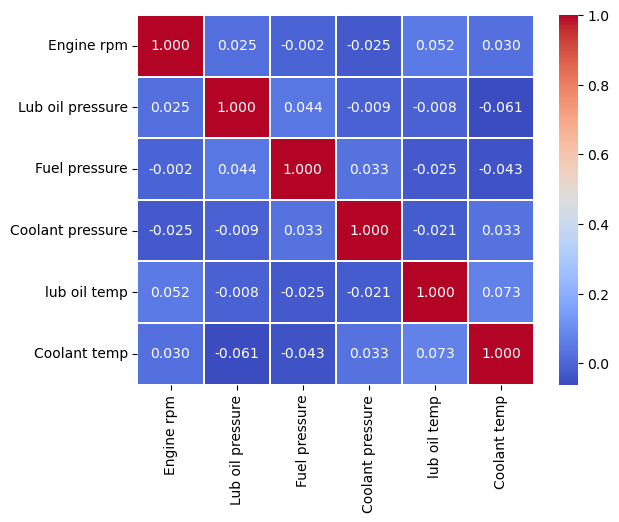

In [20]:
sns.heatmap(X.corr(),annot=True, fmt = '.3f', linewidth=0.1, cmap = 'coolwarm')

<Axes: >

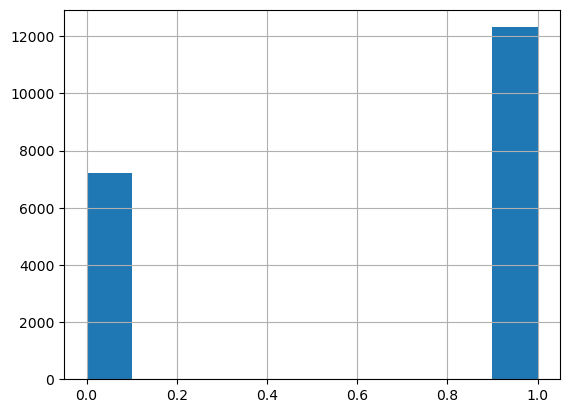

In [24]:
y.hist()

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8, stratify=y)

In [33]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [35]:
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((15628, 6), (3907, 6), (15628,), (3907,))

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

result = pd.DataFrame(columns=['Model','Accuracy','Precision','Recall','F1-score'])

In [41]:
def get_metrics(y_test,y_pred):
    
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    
    print(f'Accuracy: {accuracy:.3f}')
    print(f'Precision: {precision:.3f}')
    print(f'Recall: {recall:.3f}')
    print(f'F1-score: {f1:.3f}')
    
    return accuracy, precision, recall, f1

In [44]:
from sklearn.linear_model import LogisticRegression

model = 'LogReg'

model_log = LogisticRegression()
model_log.fit(X_train_scaled, y_train)
y_pred = model_log.predict(X_test_scaled)

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
result = pd.concat([result, pd.DataFrame({'Model': [model], 'Accuracy': [accuracy], 
                                          'Precision': [precision], 'Recall': [recall], 
                                          'F1-score': [f1]})])

Accuracy: 0.657
Precision: 0.680
Recall: 0.860
F1-score: 0.759


In [47]:
from sklearn.tree import DecisionTreeClassifier

model = 'DecTree'

model_tree = DecisionTreeClassifier()
model_tree.fit(X_train_scaled,y_train)
y_pred = model_tree.predict(X_test_scaled)

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
result = pd.concat([result, pd.DataFrame({'Model': [model], 'Accuracy': [accuracy], 
                                          'Precision': [precision], 'Recall': [recall], 
                                          'F1-score': [f1]})])

Accuracy: 0.579
Precision: 0.670
Recall: 0.657
F1-score: 0.663


In [50]:
from sklearn.ensemble import RandomForestClassifier

model = 'RandForest'

model_forest = RandomForestClassifier(random_state=42)
model_forest.fit(X_train_scaled, y_train)
y_pred = model_forest.predict(X_test_scaled)

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
result = pd.concat([result, pd.DataFrame({'Model': [model], 'Accuracy': [accuracy], 
                                          'Precision': [precision], 'Recall': [recall], 
                                          'F1-score': [f1]})])

Accuracy: 0.641
Precision: 0.688
Recall: 0.788
F1-score: 0.735


In [53]:
import xgboost as xgb

model = 'XGBoost'

model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train_scaled,y_train)
y_pred = model_xgb.predict(X_test_scaled)

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
result = pd.concat([result, pd.DataFrame({'Model': [model], 'Accuracy': [accuracy], 
                                          'Precision': [precision], 'Recall': [recall], 
                                          'F1-score': [f1]})])

Accuracy: 0.632
Precision: 0.684
Recall: 0.771
F1-score: 0.725


In [105]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    # 'penalty': ['l2', 'none'],  # Type of regularization
    # 'class_weight': ['balanced', 'None']
}

In [107]:
grid_search = GridSearchCV(estimator=model_log, param_grid=param_grid, cv=5, scoring='accuracy')

In [109]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, scoring='accuracy')

In [114]:
model_log_fine = grid_search.best_estimator_

In [116]:
model = 'Log_fine'

model_log_fine.fit(X_train_scaled,y_train)
y_pred = model_log_fine.predict(X_test_scaled)

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
result = pd.concat([result, pd.DataFrame({'Model': [model], 'Accuracy': [accuracy], 
                                          'Precision': [precision], 'Recall': [recall], 
                                          'F1-score': [f1]})])

Accuracy: 0.656
Precision: 0.681
Recall: 0.856
F1-score: 0.758


In [120]:
param_grid = {
    'criterion': ['gini', 'entropy'],  # Criteria for information gain
    'max_depth': [3, 5, 10, None],     # Max depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],     # Minimum number of samples required to be at a leaf node
}

In [122]:
grid_search = GridSearchCV(estimator=model_tree, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [124]:
model_tree_fine = grid_search.best_estimator_

In [126]:
model = 'DecTree_fine'

model_tree_fine.fit(X_train_scaled,y_train)
y_pred = model_tree_fine.predict(X_test_scaled)

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
result = pd.concat([result, pd.DataFrame({'Model': [model], 'Accuracy': [accuracy], 
                                          'Precision': [precision], 'Recall': [recall], 
                                          'F1-score': [f1]})])

Accuracy: 0.642
Precision: 0.694
Recall: 0.775
F1-score: 0.732


In [131]:
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosted trees to fit
    'learning_rate': [0.01, 0.1, 0.3],  # Step size shrinkage used in update to prevents overfitting
    'max_depth': [3, 5, 7],  # Maximum depth of a tree
    'subsample': [0.6, 0.8, 1.0],  # Subsample ratio of the training instances
    'colsample_bytree': [0.6, 0.8, 1.0]  # Subsample ratio of columns when constructing each tree
}

In [135]:
from sklearn.model_selection import RandomizedSearchCV

grid_search = RandomizedSearchCV(estimator=model_xgb, param_distributions=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train_scaled, y_train)

model_xgb_fine = grid_search.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [137]:
model = 'xgb_fine'

model_xgb_fine.fit(X_train_scaled,y_train)
y_pred = model_xgb_fine.predict(X_test_scaled)

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
result = pd.concat([result, pd.DataFrame({'Model': [model], 'Accuracy': [accuracy], 
                                          'Precision': [precision], 'Recall': [recall], 
                                          'F1-score': [f1]})])

Accuracy: 0.658
Precision: 0.696
Recall: 0.812
F1-score: 0.750


In [166]:
import keras
from keras.models import Sequential
from keras import layers
from keras.callbacks import EarlyStopping
from keras.regularizers import l2

In [143]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=10)

In [194]:
model_NN_1 = Sequential([
    
    layers.Dense(256, activation= 'relu', input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dense(128, activation= 'relu', kernel_regularizer=l2(0.01)),
    layers.BatchNormalization(),
    layers.Dense(64, activation= 'tanh'),
    layers.Dense(1, activation='sigmoid')
    
])

model_NN_1.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

history = model_NN_1.fit(X_train_scaled,y_train, batch_size = 64, epochs = 30, 
                         validation_split = 0.2, callbacks = early_stop, verbose = 1)

Epoch 1/30
196/196 [==============================] - 3s 7ms/step - loss: 1.3159 - accuracy: 0.6558 - val_loss: 0.8971 - val_accuracy: 0.6292
Epoch 2/30
196/196 [==============================] - 1s 6ms/step - loss: 0.7579 - accuracy: 0.6561 - val_loss: 0.6980 - val_accuracy: 0.6459
Epoch 3/30
196/196 [==============================] - 1s 6ms/step - loss: 0.6605 - accuracy: 0.6609 - val_loss: 0.6440 - val_accuracy: 0.6599
Epoch 4/30
196/196 [==============================] - 1s 6ms/step - loss: 0.6349 - accuracy: 0.6601 - val_loss: 0.6297 - val_accuracy: 0.6667
Epoch 5/30
196/196 [==============================] - 1s 5ms/step - loss: 0.6294 - accuracy: 0.6580 - val_loss: 0.6250 - val_accuracy: 0.6628
Epoch 6/30
196/196 [==============================] - 1s 6ms/step - loss: 0.6204 - accuracy: 0.6645 - val_loss: 0.6223 - val_accuracy: 0.6475
Epoch 7/30
196/196 [==============================] - 1s 6ms/step - loss: 0.6210 - accuracy: 0.6649 - val_loss: 0.6200 - val_accuracy: 0.6577
Epoch 

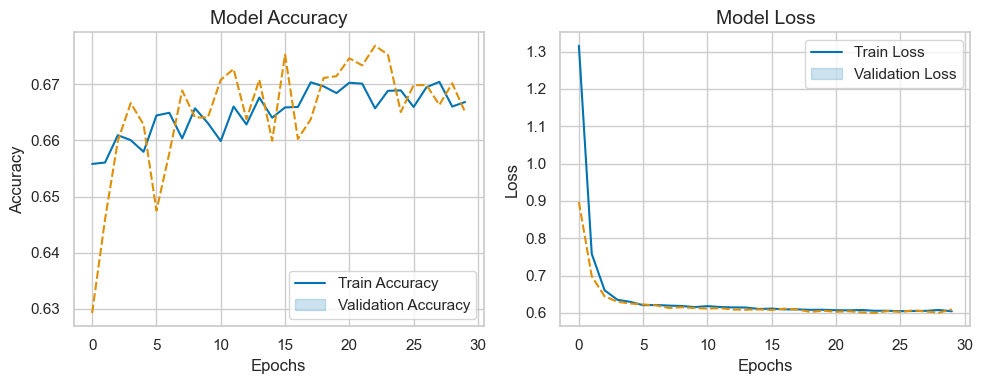

123/123 [==============================] - 0s 3ms/step - loss: 0.6194 - accuracy: 0.6514
Test accuracy: 0.6513949036598206


In [196]:
history_df = pd.DataFrame(history.history)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax = ax.flatten()

color_palette = sns.color_palette("colorblind", n_colors=2)
sns.set(style="whitegrid")

sns.lineplot(data=history_df[['accuracy', 'val_accuracy']], ax=ax[0], palette=color_palette)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train Accuracy', 'Validation Accuracy'], loc='lower right')
ax[0].set_title("Model Accuracy", fontsize=14)

sns.lineplot(data=history_df[['loss', 'val_loss']], ax=ax[1], palette=color_palette)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train Loss', 'Validation Loss'], loc='upper right')
ax[1].set_title("Model Loss", fontsize=14)

plt.tight_layout()
plt.show()

test_loss, test_acc = model_NN_1.evaluate(X_test_scaled,y_test)
print('Test accuracy:', test_acc)

In [199]:
model = 'NN'

y_pred = model_NN_1.predict(X_test_scaled)

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred.round(0))
result = pd.concat([result, pd.DataFrame({'Model': [model], 'Accuracy': [accuracy], 
                                          'Precision': [precision], 'Recall': [recall], 
                                          'F1-score': [f1]})])

123/123 [==============================] - 1s 2ms/step
Accuracy: 0.651
Precision: 0.670
Recall: 0.882
F1-score: 0.761


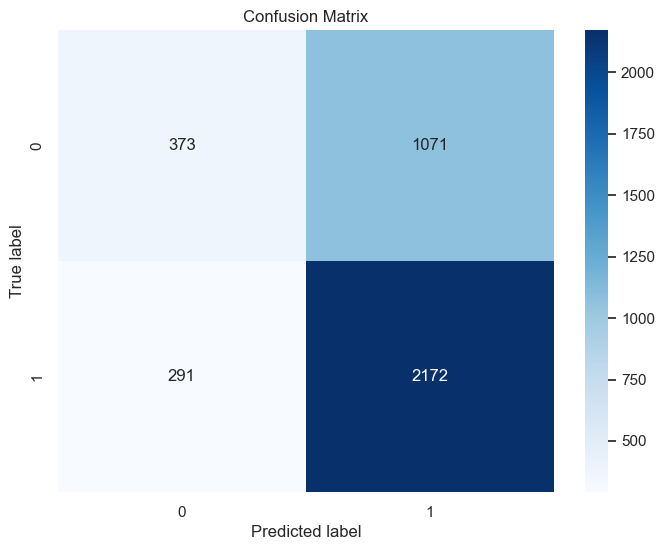

In [204]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred.round(0))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

In [206]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

In [213]:
print("Class Weights:", class_weights_dict)

Class Weights: {0: 1.353307932109456, 1: 0.792977471077735}


In [227]:
model_NN_2 = Sequential([
    
    layers.Dense(256, activation= 'relu', input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dense(128, activation= 'relu', kernel_regularizer=l2(0.01)),
    layers.BatchNormalization(),
    layers.Dense(128, activation= 'relu'),
    layers.Dense(128, activation= 'relu'),
    layers.Dense(128, activation= 'relu'),
    layers.Dense(64, activation= 'tanh'),
    layers.Dense(1, activation='sigmoid')
    
])

model_NN_2.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

history = model_NN_2.fit(X_train_scaled,y_train, batch_size = 64, epochs = 30, 
                         validation_split = 0.1, callbacks = early_stop, 
                         verbose = 1, class_weight=class_weights_dict)

Epoch 1/30
220/220 [==============================] - 3s 7ms/step - loss: 1.1771 - accuracy: 0.6242 - val_loss: 0.8002 - val_accuracy: 0.5182
Epoch 2/30
220/220 [==============================] - 1s 6ms/step - loss: 0.6854 - accuracy: 0.6250 - val_loss: 0.6980 - val_accuracy: 0.5790
Epoch 3/30
220/220 [==============================] - 1s 7ms/step - loss: 0.6502 - accuracy: 0.6317 - val_loss: 0.6719 - val_accuracy: 0.6014
Epoch 4/30
220/220 [==============================] - 1s 6ms/step - loss: 0.6430 - accuracy: 0.6296 - val_loss: 0.6422 - val_accuracy: 0.6321
Epoch 5/30
220/220 [==============================] - 1s 6ms/step - loss: 0.6419 - accuracy: 0.6336 - val_loss: 0.6648 - val_accuracy: 0.6180
Epoch 6/30
220/220 [==============================] - 1s 6ms/step - loss: 0.6401 - accuracy: 0.6319 - val_loss: 0.6933 - val_accuracy: 0.5931
Epoch 7/30
220/220 [==============================] - 1s 6ms/step - loss: 0.6397 - accuracy: 0.6366 - val_loss: 0.6518 - val_accuracy: 0.6238
Epoch 

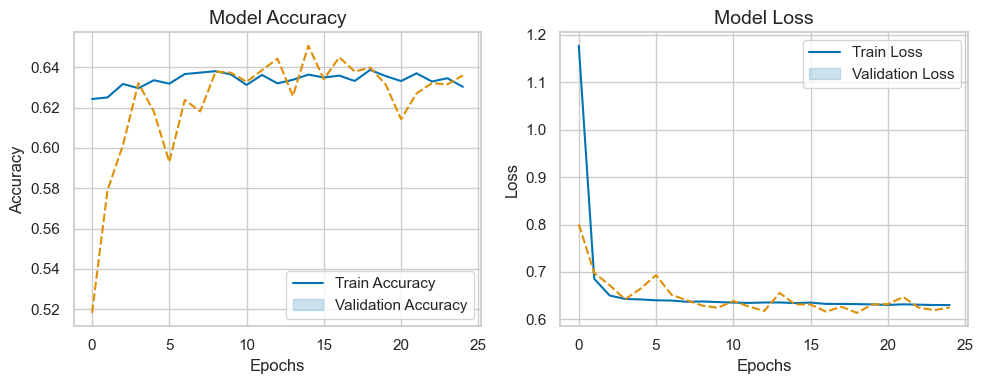

123/123 [==============================] - 0s 3ms/step - loss: 0.6439 - accuracy: 0.6138
Test accuracy: 0.6137701272964478


In [229]:
history_df = pd.DataFrame(history.history)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax = ax.flatten()

color_palette = sns.color_palette("colorblind", n_colors=2)
sns.set(style="whitegrid")

sns.lineplot(data=history_df[['accuracy', 'val_accuracy']], ax=ax[0], palette=color_palette)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train Accuracy', 'Validation Accuracy'], loc='lower right')
ax[0].set_title("Model Accuracy", fontsize=14)

sns.lineplot(data=history_df[['loss', 'val_loss']], ax=ax[1], palette=color_palette)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train Loss', 'Validation Loss'], loc='upper right')
ax[1].set_title("Model Loss", fontsize=14)

plt.tight_layout()
plt.show()

test_loss, test_acc = model_NN_2.evaluate(X_test_scaled,y_test)
print('Test accuracy:', test_acc)

In [231]:
model = 'NN_weights'

y_pred = model_NN_2.predict(X_test_scaled)

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred.round(0))
result = pd.concat([result, pd.DataFrame({'Model': [model], 'Accuracy': [accuracy], 
                                          'Precision': [precision], 'Recall': [recall], 
                                          'F1-score': [f1]})])

123/123 [==============================] - 0s 1ms/step
Accuracy: 0.614
Precision: 0.756
Recall: 0.572
F1-score: 0.651


# more features

In [316]:
X.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,T_ratio,P_ratio,delta_T,delta_P,lub_rot,fuel_rot,cool,lub
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1.030772,0.211484,2.511976,-9.297336,0.003562,0.016844,259.507153,209.821196
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0.941722,0.181649,-4.804790,-13.252260,0.003358,0.018486,203.187793,228.389032
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,0.976226,0.451958,-1.893511,-3.591401,0.005696,0.012602,84.770725,230.282429
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1.032815,0.190046,2.355278,-15.802337,0.007839,0.041248,267.536725,274.861445
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0.901112,0.360440,-8.603237,-10.065953,0.009165,0.025426,178.546339,444.739735


In [241]:
X['T_ratio'] = X['lub oil temp'] / X['Coolant temp']
X['P_ratio'] = X['Lub oil pressure'] / X['Fuel pressure']

In [243]:
X['delta_T'] = X['lub oil temp'] - X['Coolant temp']
X['delta_P'] = X['Lub oil pressure'] - X['Fuel pressure']

In [245]:
X['lub_rot'] = X['Lub oil pressure'] / X['Engine rpm']
X['fuel_rot'] = X['Fuel pressure'] / X['Engine rpm']

In [314]:
X['cool'] = X['Coolant pressure'] * X['Coolant temp']
X['lub'] = X['Lub oil pressure'] * X['lub oil temp']

In [318]:
X.head(2)

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,T_ratio,P_ratio,delta_T,delta_P,lub_rot,fuel_rot,cool,lub
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1.030772,0.211484,2.511976,-9.297336,0.003562,0.016844,259.507153,209.821196
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0.941722,0.181649,-4.804790,-13.252260,0.003358,0.018486,203.187793,228.389032


<Axes: >

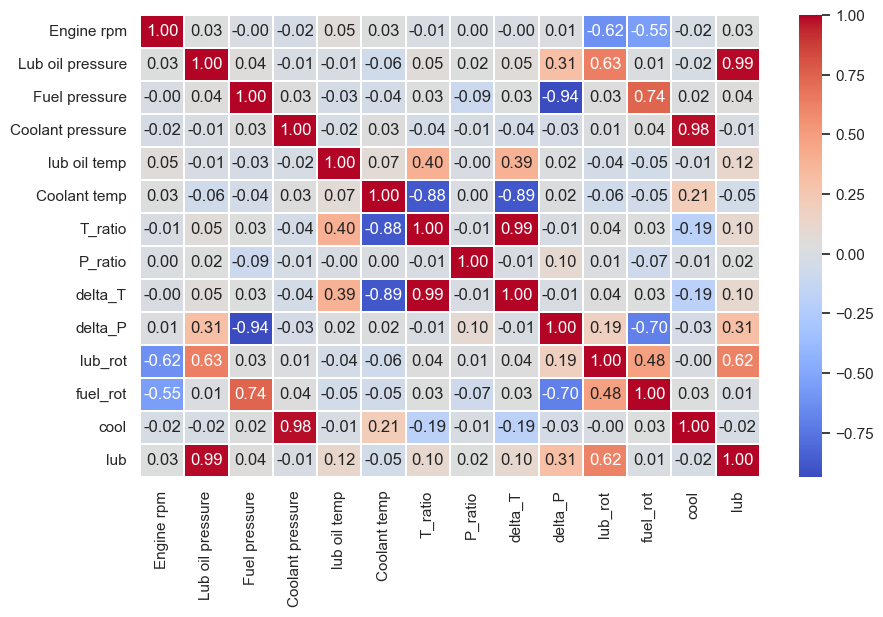

In [320]:
plt.figure(figsize=(10,6))
sns.heatmap(X.corr(),annot=True,fmt='.2f',cmap='coolwarm',linewidth=0.1)

In [324]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [326]:
model_NN_3 = Sequential([
    
    layers.Dense(512, activation= 'relu', input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dense(128, activation= 'relu', kernel_regularizer=l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(64, activation= 'tanh'),
    layers.Dropout(0.1),
    layers.Dense(32, activation= 'tanh'),
    layers.Dense(1, activation='sigmoid')
    
])

model_NN_3.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

history = model_NN_3.fit(X_train_scaled,y_train, batch_size = 64, epochs = 30, 
                         validation_split = 0.2, callbacks = early_stop, verbose = 1)

Epoch 1/30
196/196 [==============================] - 4s 10ms/step - loss: 1.2320 - accuracy: 0.6507 - val_loss: 0.7880 - val_accuracy: 0.6318
Epoch 2/30
196/196 [==============================] - 2s 9ms/step - loss: 0.6806 - accuracy: 0.6507 - val_loss: 0.6686 - val_accuracy: 0.6398
Epoch 3/30
196/196 [==============================] - 2s 9ms/step - loss: 0.6375 - accuracy: 0.6574 - val_loss: 0.6361 - val_accuracy: 0.6596
Epoch 4/30
196/196 [==============================] - 2s 9ms/step - loss: 0.6320 - accuracy: 0.6521 - val_loss: 0.6383 - val_accuracy: 0.6625
Epoch 5/30
196/196 [==============================] - 2s 8ms/step - loss: 0.6265 - accuracy: 0.6601 - val_loss: 0.6289 - val_accuracy: 0.6635
Epoch 6/30
196/196 [==============================] - 2s 8ms/step - loss: 0.6282 - accuracy: 0.6597 - val_loss: 0.6331 - val_accuracy: 0.6606
Epoch 7/30
196/196 [==============================] - 2s 8ms/step - loss: 0.6220 - accuracy: 0.6628 - val_loss: 0.6306 - val_accuracy: 0.6555
Epoch

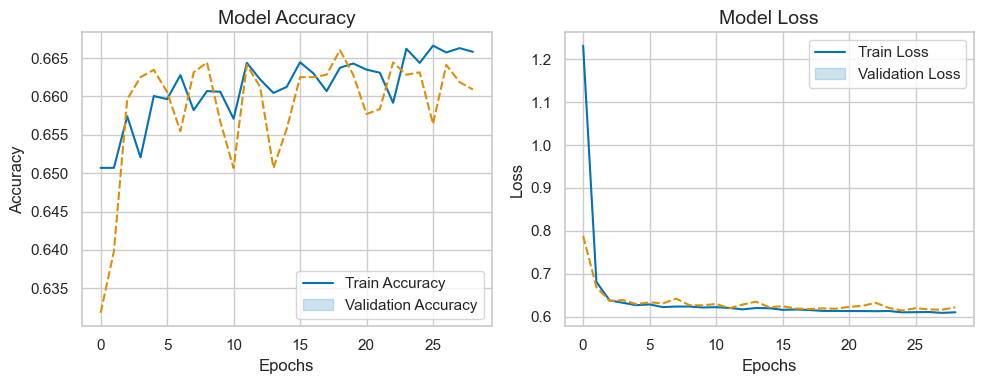

123/123 [==============================] - 0s 3ms/step - loss: 0.6198 - accuracy: 0.6629
Test accuracy: 0.6629127264022827


In [328]:
history_df = pd.DataFrame(history.history)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax = ax.flatten()

color_palette = sns.color_palette("colorblind", n_colors=2)
sns.set(style="whitegrid")

sns.lineplot(data=history_df[['accuracy', 'val_accuracy']], ax=ax[0], palette=color_palette)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train Accuracy', 'Validation Accuracy'], loc='lower right')
ax[0].set_title("Model Accuracy", fontsize=14)

sns.lineplot(data=history_df[['loss', 'val_loss']], ax=ax[1], palette=color_palette)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train Loss', 'Validation Loss'], loc='upper right')
ax[1].set_title("Model Loss", fontsize=14)

plt.tight_layout()
plt.show()

test_loss, test_acc = model_NN_3.evaluate(X_test_scaled,y_test)
print('Test accuracy:', test_acc)

In [334]:
# result = result.iloc[:-4]
result

,Model,Accuracy,Precision,Recall,F1-score
0,LogReg,0.656514,0.679936,0.859927,0.759412
0,DecTree,0.579473,0.669702,0.656922,0.663251
0,RandForest,0.641413,0.688298,0.788063,0.73481
0,XGBoost,0.631687,0.684438,0.771417,0.725329
0,Log_fine,0.656258,0.680762,0.856273,0.758497
0,DecTree_fine,0.642437,0.693677,0.775071,0.732119
0,xgb_fine,0.65805,0.696273,0.811612,0.749531
0,NN,0.651395,0.66975,0.881851,0.761304
0,NN_weights,0.61377,0.755627,0.572473,0.651421


In [336]:
model = 'NN_extra_features'

y_pred = model_NN_3.predict(X_test_scaled)

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred.round(0))
result = pd.concat([result, pd.DataFrame({'Model': [model], 'Accuracy': [accuracy], 
                                          'Precision': [precision], 'Recall': [recall], 
                                          'F1-score': [f1]})])

123/123 [==============================] - 0s 2ms/step
Accuracy: 0.663
Precision: 0.690
Recall: 0.844
F1-score: 0.759


In [339]:
model = 'DecTree_extra_features'

model_tree = DecisionTreeClassifier()
model_tree.fit(X_train_scaled,y_train)
y_pred = model_tree.predict(X_test_scaled)

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
result = pd.concat([result, pd.DataFrame({'Model': [model], 'Accuracy': [accuracy], 
                                          'Precision': [precision], 'Recall': [recall], 
                                          'F1-score': [f1]})])

Accuracy: 0.593
Precision: 0.676
Recall: 0.681
F1-score: 0.678


In [341]:
model = 'XGBoost_extra_features'

model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train_scaled,y_train)
y_pred = model_xgb.predict(X_test_scaled)

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
result = pd.concat([result, pd.DataFrame({'Model': [model], 'Accuracy': [accuracy], 
                                          'Precision': [precision], 'Recall': [recall], 
                                          'F1-score': [f1]})])

Accuracy: 0.648
Precision: 0.694
Recall: 0.788
F1-score: 0.738


In [343]:
model = 'LogReg_extra_features'

model_log = LogisticRegression()
model_log.fit(X_train_scaled, y_train)
y_pred = model_log.predict(X_test_scaled)

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
result = pd.concat([result, pd.DataFrame({'Model': [model], 'Accuracy': [accuracy], 
                                          'Precision': [precision], 'Recall': [recall], 
                                          'F1-score': [f1]})])

Accuracy: 0.657
Precision: 0.677
Recall: 0.874
F1-score: 0.763


In [345]:
result

,Model,Accuracy,Precision,Recall,F1-score
0,LogReg,0.656514,0.679936,0.859927,0.759412
0,DecTree,0.579473,0.669702,0.656922,0.663251
0,RandForest,0.641413,0.688298,0.788063,0.73481
0,XGBoost,0.631687,0.684438,0.771417,0.725329
0,Log_fine,0.656258,0.680762,0.856273,0.758497
0,DecTree_fine,0.642437,0.693677,0.775071,0.732119
0,xgb_fine,0.65805,0.696273,0.811612,0.749531
0,NN,0.651395,0.66975,0.881851,0.761304
0,NN_weights,0.61377,0.755627,0.572473,0.651421
0,NN_extra_features,0.662913,0.690365,0.843687,0.759364


123/123 [==============================] - 0s 2ms/step


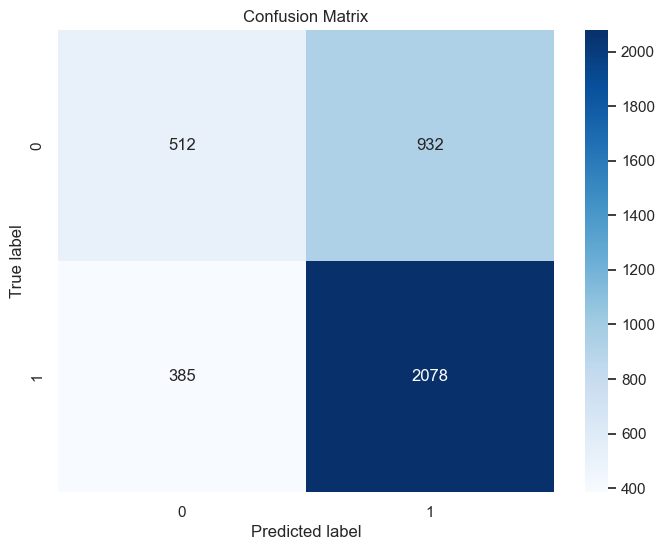

In [355]:
y_pred = model_NN_3.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, y_pred.round(0))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

In [357]:
from imblearn.over_sampling import SMOTE

In [359]:
oversample = SMOTE()
X_balanced, y_balanced = oversample.fit_resample(X, y)

In [361]:
X_balanced.shape, y_balanced.shape

((24634, 14), (24634,))

In [365]:
y_balanced.head()

0    1
1    0
2    1
3    1
4    0
Name: Engine Condition, dtype: int64

<Axes: xlabel='Engine Condition', ylabel='count'>

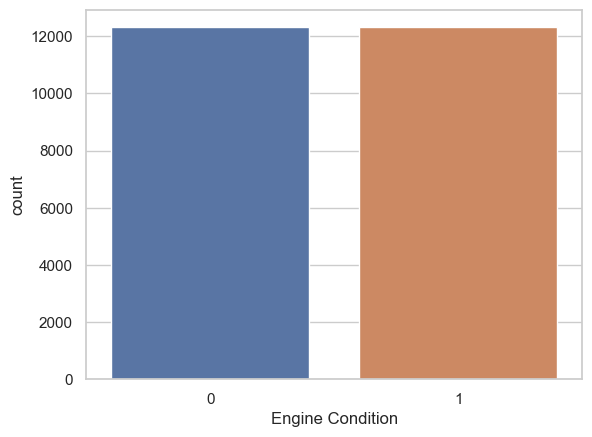

In [407]:
sns.countplot(data=pd.DataFrame(y_balanced), x='Engine Condition', hue = 'Engine Condition', legend=False)

In [412]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, train_size=0.8)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [421]:
model_NN_4 = Sequential([
    
    layers.Dense(512, activation= 'relu', input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dense(128, activation= 'relu', kernel_regularizer=l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(64, activation= 'tanh'),
    layers.Dropout(0.1),
    layers.Dense(32, activation= 'tanh'),
    layers.Dense(1, activation='sigmoid')
    
])

model_NN_4.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

history = model_NN_4.fit(X_train_scaled,y_train, batch_size = 64, epochs = 30, 
                         validation_split = 0.3, callbacks = early_stop, verbose = 1)

Epoch 1/30
216/216 [==============================] - 5s 13ms/step - loss: 1.3102 - accuracy: 0.6253 - val_loss: 0.8816 - val_accuracy: 0.4970
Epoch 2/30
216/216 [==============================] - 2s 10ms/step - loss: 0.7284 - accuracy: 0.6312 - val_loss: 0.7130 - val_accuracy: 0.5750
Epoch 3/30
216/216 [==============================] - 2s 11ms/step - loss: 0.6710 - accuracy: 0.6301 - val_loss: 0.6628 - val_accuracy: 0.6391
Epoch 4/30
216/216 [==============================] - 2s 11ms/step - loss: 0.6643 - accuracy: 0.6389 - val_loss: 0.6521 - val_accuracy: 0.6535
Epoch 5/30
216/216 [==============================] - 2s 11ms/step - loss: 0.6603 - accuracy: 0.6367 - val_loss: 0.6526 - val_accuracy: 0.6504
Epoch 6/30
216/216 [==============================] - 2s 11ms/step - loss: 0.6589 - accuracy: 0.6434 - val_loss: 0.6591 - val_accuracy: 0.6361
Epoch 7/30
216/216 [==============================] - 3s 12ms/step - loss: 0.6542 - accuracy: 0.6397 - val_loss: 0.6555 - val_accuracy: 0.6425

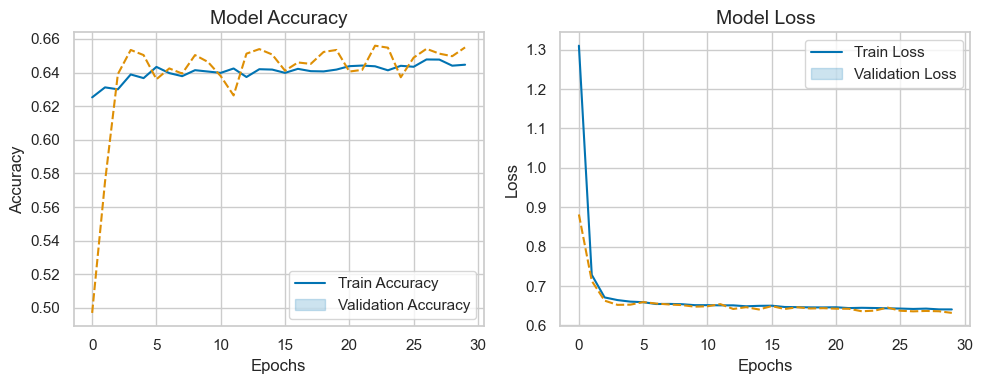

154/154 [==============================] - 1s 3ms/step - loss: 0.6301 - accuracy: 0.6590
Test accuracy: 0.6590217351913452


In [423]:
history_df = pd.DataFrame(history.history)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax = ax.flatten()

color_palette = sns.color_palette("colorblind", n_colors=2)
sns.set(style="whitegrid")

sns.lineplot(data=history_df[['accuracy', 'val_accuracy']], ax=ax[0], palette=color_palette)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train Accuracy', 'Validation Accuracy'], loc='lower right')
ax[0].set_title("Model Accuracy", fontsize=14)

sns.lineplot(data=history_df[['loss', 'val_loss']], ax=ax[1], palette=color_palette)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train Loss', 'Validation Loss'], loc='upper right')
ax[1].set_title("Model Loss", fontsize=14)

plt.tight_layout()
plt.show()

test_loss, test_acc = model_NN_4.evaluate(X_test_scaled,y_test)
print('Test accuracy:', test_acc)

In [425]:
model = 'NN_extra_features+SMOTE'

y_pred = model_NN_4.predict(X_test_scaled)

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred.round(0))
result = pd.concat([result, pd.DataFrame({'Model': [model], 'Accuracy': [accuracy], 
                                          'Precision': [precision], 'Recall': [recall], 
                                          'F1-score': [f1]})])

154/154 [==============================] - 1s 3ms/step
Accuracy: 0.659
Precision: 0.674
Recall: 0.624
F1-score: 0.648


In [427]:
model = 'DecTree_extra_features+SMOTE'

model_tree = DecisionTreeClassifier()
model_tree.fit(X_train_scaled,y_train)
y_pred = model_tree.predict(X_test_scaled)

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
result = pd.concat([result, pd.DataFrame({'Model': [model], 'Accuracy': [accuracy], 
                                          'Precision': [precision], 'Recall': [recall], 
                                          'F1-score': [f1]})])

Accuracy: 0.623
Precision: 0.630
Recall: 0.610
F1-score: 0.620


In [429]:
model = 'XGBoost_extra_features+SMOTE'

model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train_scaled,y_train)
y_pred = model_xgb.predict(X_test_scaled)

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
result = pd.concat([result, pd.DataFrame({'Model': [model], 'Accuracy': [accuracy], 
                                          'Precision': [precision], 'Recall': [recall], 
                                          'F1-score': [f1]})])

Accuracy: 0.682
Precision: 0.698
Recall: 0.649
F1-score: 0.673


In [431]:
model = 'LogReg_extra_features+SMOTE'

model_log = LogisticRegression()
model_log.fit(X_train_scaled, y_train)
y_pred = model_log.predict(X_test_scaled)

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
result = pd.concat([result, pd.DataFrame({'Model': [model], 'Accuracy': [accuracy], 
                                          'Precision': [precision], 'Recall': [recall], 
                                          'F1-score': [f1]})])

Accuracy: 0.649
Precision: 0.656
Recall: 0.639
F1-score: 0.647


In [433]:
result

,Model,Accuracy,Precision,Recall,F1-score
0,LogReg,0.656514,0.679936,0.859927,0.759412
0,DecTree,0.579473,0.669702,0.656922,0.663251
0,RandForest,0.641413,0.688298,0.788063,0.73481
0,XGBoost,0.631687,0.684438,0.771417,0.725329
0,Log_fine,0.656258,0.680762,0.856273,0.758497
0,DecTree_fine,0.642437,0.693677,0.775071,0.732119
0,xgb_fine,0.65805,0.696273,0.811612,0.749531
0,NN,0.651395,0.66975,0.881851,0.761304
0,NN_weights,0.61377,0.755627,0.572473,0.651421
0,NN_extra_features,0.662913,0.690365,0.843687,0.759364


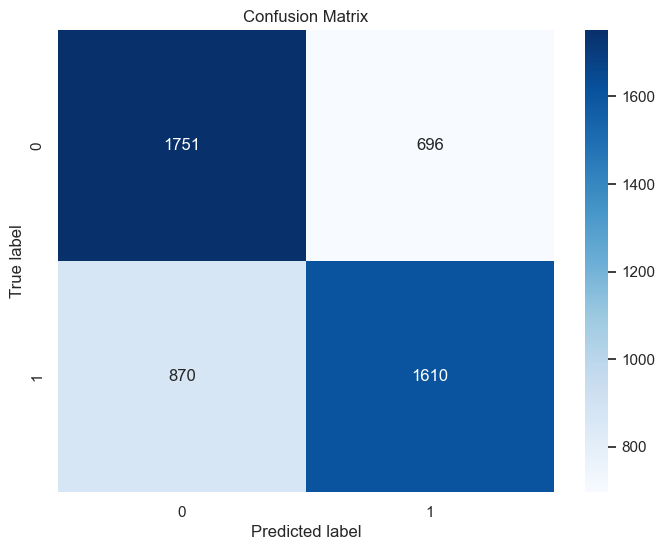

In [436]:
y_pred = model_xgb.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, y_pred.round(0))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

In [497]:
def plot_metrics(df):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
    
    # Create a figure with subplots
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
    fig.suptitle('Model Comparison on Different Metrics', fontsize=16)

    # Plot each metric in a subplot
    for i, metric in enumerate(metrics):
        ax = axes[i // 2, i % 2]  # Choose subplot
        df.plot(x='Model', y=metric, kind='bar', ax=ax, legend=False)
        ax.set_title(f'{metric} Comparison')
        ax.set_ylabel(metric)
        ax.set_xlabel('Model')
        ax.set_ylim(0.5, 0.9)
        ax.tick_params(axis='x', rotation=90)

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to not overlap with the title
    plt.show()

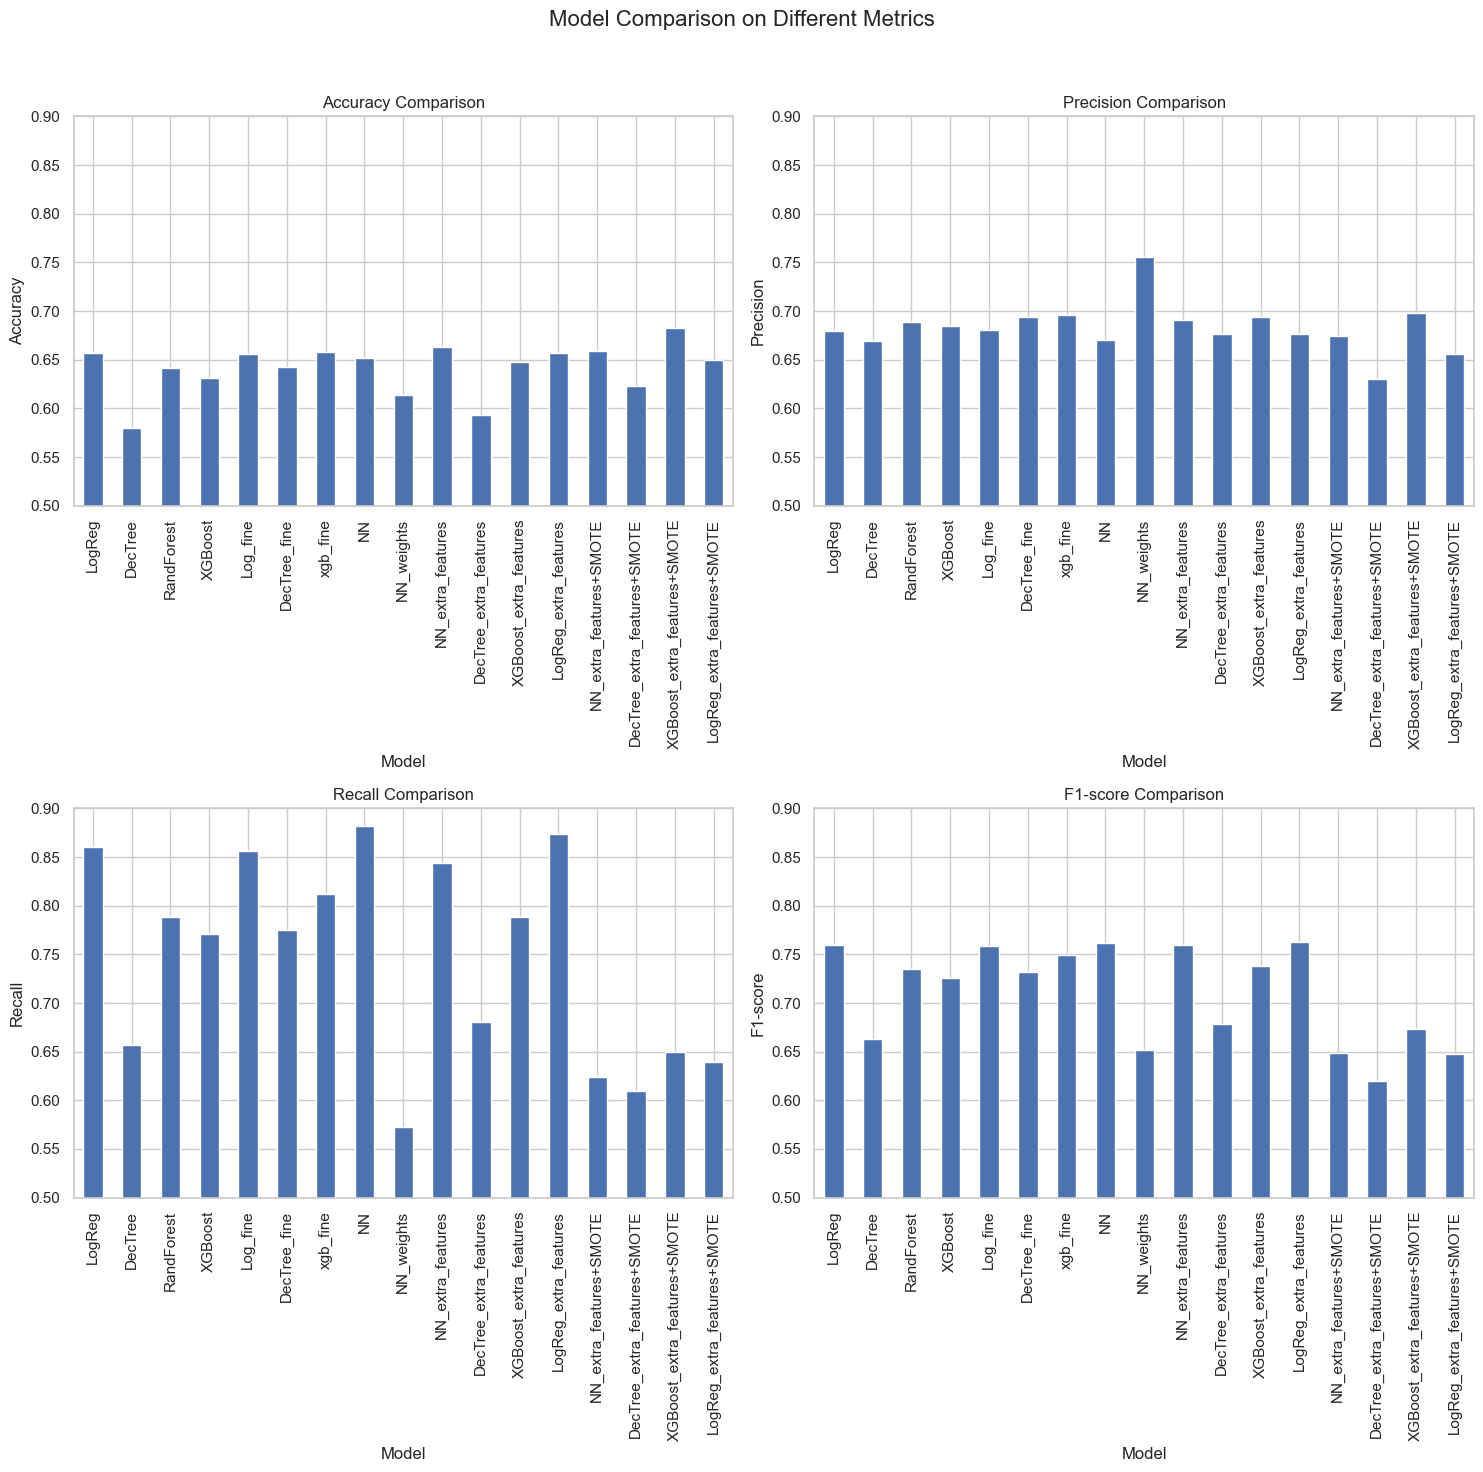

In [499]:
plot_metrics(result)